# FIRST YEAR BIRTHDAY "ANNUAL REPORT" 
---

A fun analysis of the growth and consumption and sleep patterns during the first year of life for our twins, Amos and Rilka. 

### Imports

In [85]:
# Imports and global options

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import zipfile
import os
import plotly.express as px 

# display numbers with two decimal places
pd.options.display.float_format = '{:,.2f}'.format

# import one year data from Baby Connect 
rlk_1 = pd.read_csv('../../dat/Rilka_upto11062020.csv') #Rilka's data
ams_1 = pd.read_csv('../../dat/Amos_upto11062020.csv') #Amos's data
 

# import additional measurements data from google sheets
rlk_2 = pd.read_csv('../../dat/Measurements_Rilka.csv') # Rilka's data
ams_2 = pd.read_csv('../../dat/Measurements_Amos.csv') # Amos's data

In [37]:
rlk_2.head(3)

,Date,head_circumference,head_percentile,bicep_C,thing_c,chest_c,waist_c,arm_length_wristtoshoulder,leg_length,height,height_percentile,weight_pounds,weight_percentile
0,7/13/2019,nan,nan,nan,nan,nan,nan,nan,nan,42.00,nan,4.66,0
1,7/21/2019,32.00,nan,8.00,11.00,29.00,26.50,15.00,18.00,47.00,13.00,4.73,0
2,8/2/2019,34.00,nan,8.25,13.00,33.00,34.00,15.00,19.00,52.00,71.00,5.70,1


In [38]:
ams_2.head(3)

,Date,head_circumference,head_percentile,bicep_C,thing_c,chest_c,waist_c,arm_length_wristtoshoulder,leg_length,height,height_percentile,weight_pounds,weight_percentile
0,7/13/2019,nan,nan,nan,nan,nan,nan,nan,nan,48.00,nan,5.87,nan
1,7/21/2019,34.50,nan,8.50,13.00,30.50,27.50,15.50,20.00,52.00,87.00,5.65,nan
2,7/26/2019,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6.36,9.00


### Clean and Tidy
rlk_1 and ams_1 to do list:
- make 'Date and Time' column into datetime object
- when time permits, add a column with our location, based on travel dates
- make an ID column for each of them, then merge the two dataframes

rlk_2 and ams_2 to do list:
- make 'Date' column into datetime object
- make an ID column, then merge the two dataframes

In [86]:
# make 'Date and Time' column into datetime object
rlk_1['Date and Time'] = pd.to_datetime(rlk_1['Date and Time'], infer_datetime_format=True)
ams_1['Date and Time'] = pd.to_datetime(ams_1['Date and Time'], infer_datetime_format=True)
rlk_1.rename(columns={'Date and Time':'Date'}, inplace=True) # doing this here rather than later to be able to use the subset rlk or the complete df
ams_1.rename(columns={'Date and Time':'Date'}, inplace=True)

rlk_2['Date'] = pd.to_datetime(rlk_2['Date'], infer_datetime_format=True)
ams_2['Date'] = pd.to_datetime(ams_2['Date'], infer_datetime_format=True)

In [87]:
# add ID columns and merge baby connect data
rlk_1['ID'] = "Rilka"
ams_1['ID'] = 'Amos'
df_1 = rlk_1.append(ams_1).sort_values(by='Date').reset_index()



# add ID columns and merge measurements data
rlk_2['ID'] = "Rilka"
ams_2['ID'] = 'Amos'
df_2 = rlk_2.append(ams_2).sort_values(by='Date').reset_index()

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   index                       48 non-null     int64         
 1   Date                        48 non-null     datetime64[ns]
 2   head_circumference          21 non-null     float64       
 3   head_percentile             0 non-null      float64       
 4   bicep_C                     33 non-null     float64       
 5   thing_c                     33 non-null     float64       
 6   chest_c                     33 non-null     float64       
 7   waist_c                     33 non-null     float64       
 8   arm_length_wristtoshoulder  33 non-null     float64       
 9   leg_length                  33 non-null     float64       
 10  height                      42 non-null     float64       
 11  height_percentile           40 non-null     float64       
 

### Explore Growth, Number of Diapers, Caregiver hours, Amounts of milk consumed...  

Chart growth of all measured limbs and head size by month for each of them
Percentile and ratio of height: weight percentile over time
Pie chart of # entries by caregiver
Count number of diapers: stack Rilka and Amos to get totals
Tally ml of milk drank, by week 


## Rilka's Height

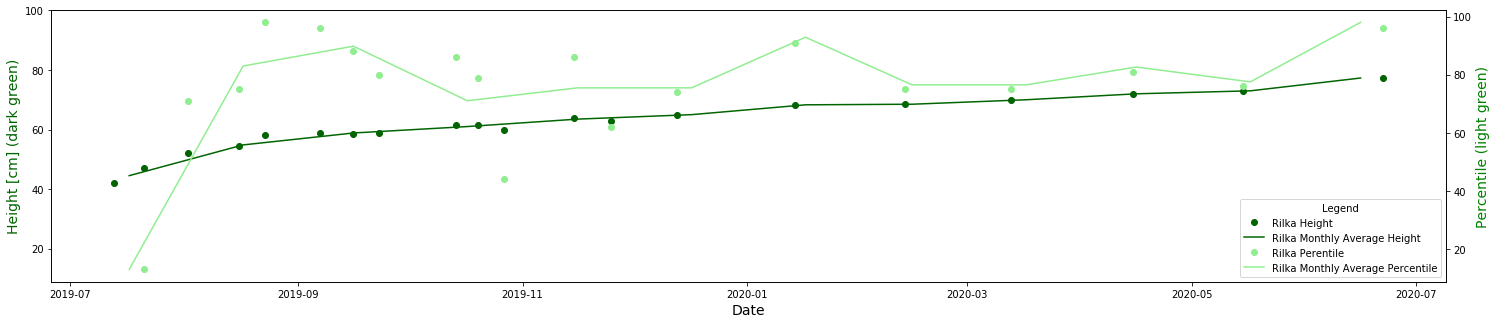

In [116]:
# exclude rows without an entry for height
df = rlk_2.copy()
df = df.dropna(axis=0, subset=['height'])

# groupby each 1 month and average, and assign to middle of the month, to smooth out curve
dg = df[['Date','height','height_percentile']].groupby(pd.Grouper(key='Date', freq='1M')).mean().reset_index() 
dg['Date'] = dg['Date'] + pd.DateOffset(days=-14)
 
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(25,5)) # and stretch it out

# make a plot for Height
p1, = ax.plot(df.Date, df.height, color="darkgreen", marker="o", linestyle="None", label="Rilka Height")
p2, = ax.plot(dg.Date, dg.height, color="darkgreen", label= "Rilka Monthly Average Height")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Height [cm] (dark green)",color="darkgreen",fontsize=14)

# twin object for two different y-axis for Percentile on the sample plot
ax2=ax.twinx()
p3, = ax2.plot(df.Date, df.height_percentile,color="lightgreen",marker="o", linestyle="None", label="Rilka Perentile")
p4, = ax.plot(dg.Date, dg.height_percentile, color="lightgreen", label= "Rilka Monthly Average Percentile")
ax2.set_ylabel("Percentile (light green)",color="green",fontsize=14)

# common legend for all
plt.legend(handles=[p1, p2, p3, p4],title="Legend", fancybox=True)

plt.show()
# save the plot as a file
fig.savefig('Rilka_growth.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


## Amos's Height

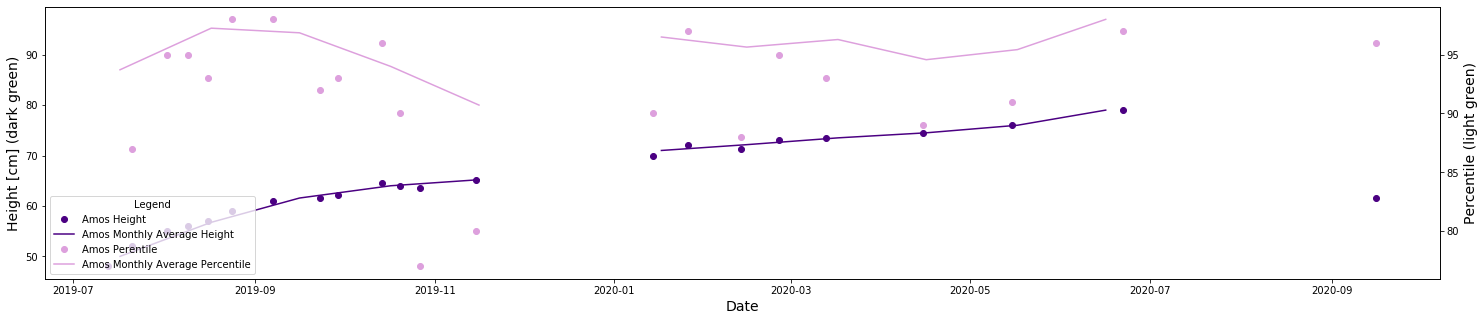

In [121]:
# exclude rows without an entry for height
df = ams_2.copy()
df = df.dropna(axis=0, subset=['height'])

# groupby each 1 month and average, and assign to middle of the month, to create a smoother curve
dg = df[['Date','height','height_percentile']].groupby(pd.Grouper(key='Date', freq='1M')).mean().reset_index() 
dg['Date'] = dg['Date'] + pd.DateOffset(days=-14)

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(25,5)) # and stretch it out

# make a plot for Height
p1, = ax.plot(df.Date, df.height, color="indigo", marker="o", linestyle="None", label="Amos Height")
p2, = ax.plot(dg.Date, dg.height, color="indigo", label= "Amos Monthly Average Height")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Height [cm] (dark green)",color="black",fontsize=14)

# twin object for two different y-axis for Percentile on the sample plot
ax2=ax.twinx()
p3, = ax2.plot(df.Date, df.height_percentile,color="plum",marker="o", linestyle="None", label="Amos Perentile")
p4, = ax.plot(dg.Date, dg.height_percentile, color="plum", label= "Amos Monthly Average Percentile")
ax2.set_ylabel("Percentile (light green)",color="black",fontsize=14)

# common legend for all
plt.legend(handles=[p1, p2, p3, p4],title="Legend", fancybox=True)

plt.show()
# save the plot as a file
fig.savefig('Amos_growth.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Number of diapers